## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = merge_df["Mouse ID"].count()
print(mouse_count)
print(len(merge_df["Mouse ID"].unique()))

1893
249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = merge_df.duplicated(subset=["Mouse ID", "Timepoint"])
duplicated_data


##Come back to this

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
merge_with_dup_df = merge_df
merge_with_dup_df["Is duplicate?"] = duplicated_data
merge_with_dup_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [5]:
merge_with_dup_df.loc[merge_with_dup_df["Is duplicate?"] == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [6]:
merge_with_dup_df.loc[merge_with_dup_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 


##Come back to this

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [9]:
clean_df.loc[clean_df["Is duplicate?"] == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?


In [10]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = clean_df["Mouse ID"].count()
print(cleaned_mouse_count)
print(len(clean_df["Mouse ID"].unique()))

1888
249


In [11]:
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Is duplicate?'],
      dtype='object')

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_group_df = clean_df.groupby("Drug Regimen") 
regimen_summary_df = pd.DataFrame()
regimen_summary_df["Mean"] = regimen_group_df["Tumor Volume (mm3)"].mean()
regimen_summary_df["median"] = regimen_group_df["Tumor Volume (mm3)"].median()
regimen_summary_df["Variance"] = regimen_group_df["Tumor Volume (mm3)"].var()
regimen_summary_df["Std"] = regimen_group_df["Tumor Volume (mm3)"].std()
regimen_summary_df["SEM"] = regimen_group_df["Tumor Volume (mm3)"].sem()
regimen_summary_df

,Mean,median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
regimen_group_df["Tumor Volume (mm3)"].max()

Drug Regimen
Capomulin    48.158209
Ceftamin     68.923185
Infubinol    72.226731
Ketapril     78.567014
Naftisol     76.668817
Placebo      73.212939
Propriva     72.455421
Ramicane     47.622816
Stelasyn     75.123690
Zoniferol    73.324432
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_sum = regimen_group_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = regimen_group_df["Drug Regimen"].count()
regimen_count


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

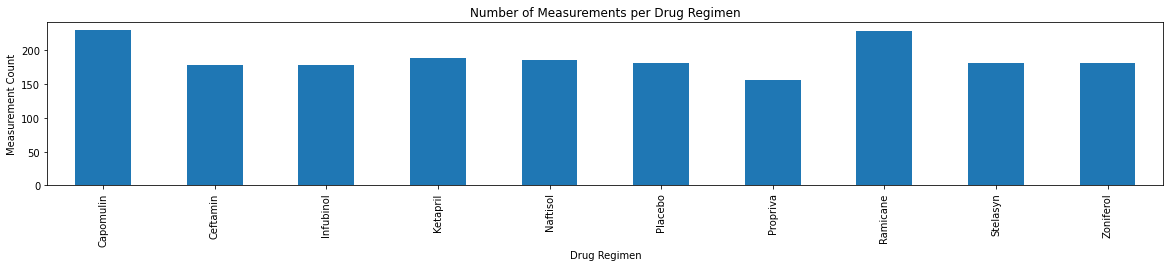

<Figure size 432x288 with 0 Axes>

In [16]:
regimen_count.plot(kind="bar", figsize=(20,3))
plt.title("Number of Measurements per Drug Regimen")
plt.ylabel("Measurement Count")
plt.show()
plt.tight_layout()

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = ["Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn",
         "Zoniferol"]
drug_count = regimen_count

Text(149.875, 0.5, 'Measurement Count')

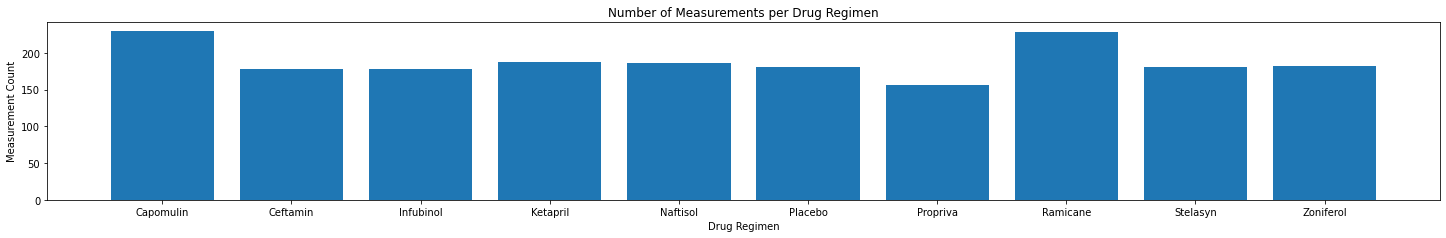

In [18]:
plt.figure(figsize=(20, 3))
plt.bar(drugs, drug_count, align="center")
plt.tight_layout()

plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurement Count")

In [19]:
#df_of_gender = clean_df[["Mouse ID", "Sex"]]
#count_of_gender = df_of_gender.drop_duplicates(subset="Mouse ID")
#gender_count = count_of_gender["Sex"].value_counts()

Text(0.5, 1.0, 'Distribution of Males vs Females')

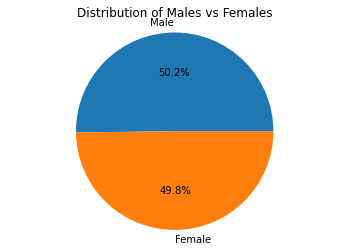

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_of_gender = clean_df[["Mouse ID", "Sex"]]
count_of_gender = df_of_gender.drop_duplicates(subset="Mouse ID")
gender_count = count_of_gender["Sex"].value_counts()
gender_count.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel("")
plt.title("Distribution of Males vs Females")


In [21]:
gender_count

Male      125
Female    124
Name: Sex, dtype: int64

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
gender_number = [gender_count]
explode = (0,0)


<ipython-input-23-1379ecd13e12>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(gender_number, explode=explode, labels=gender,


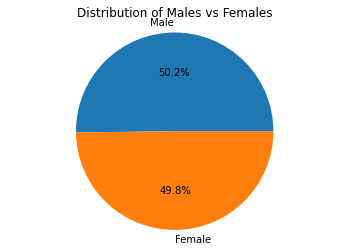

In [23]:
plt.pie(gender_number, explode=explode, labels=gender,
        autopct="%1.1f%%")
plt.axis("equal")
plt.title("Distribution of Males vs Females")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [43]:
##Printing out largest(last) timepoint by mouse
mouse_grouped = clean_df.groupby("Mouse ID")
last_timepoint = mouse_grouped["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)
last_timepoint_df

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [44]:
##Merging the last timepoint column into the original data 
timepoint_merge = pd.merge(clean_df, last_timepoint_df, on="Mouse ID", how="outer")
timepoint_merge = timepoint_merge.rename(columns={"Timepoint_x" : "Timepoint", "Timepoint_y" : "Last Timepoint"})
timepoint_merge

##Maybe change how it merges to get the tumor value at the last timepoint - either change "on" to timepoint or the how

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,False,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,False,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,False,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,False,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,False,45
...,...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,False,45
1884,z969,Naftisol,Male,9,30,30,65.841013,3,False,45
1885,z969,Naftisol,Male,9,30,35,69.176246,4,False,45
1886,z969,Naftisol,Male,9,30,40,70.314904,4,False,45


In [45]:
##Brute force - not ideal
##combining the data with the desired drugs into once dataframe 
regimen_trim = timepoint_merge[timepoint_merge["Drug Regimen"] == "Capomulin"]
regimen_trim2 = timepoint_merge[timepoint_merge["Drug Regimen"] == "Ramicane"]
regimen_trim3 = timepoint_merge[timepoint_merge["Drug Regimen"] == "Infubinol"]
regimen_trim4 = timepoint_merge[timepoint_merge["Drug Regimen"] == "Ceftamin"]

In [46]:
regimen_trim4

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint
484,a275,Ceftamin,Female,20,28,0,45.000000,0,False,45
485,a275,Ceftamin,Female,20,28,5,46.795257,0,False,45
486,a275,Ceftamin,Female,20,28,10,47.371343,0,False,45
487,a275,Ceftamin,Female,20,28,15,49.734404,0,False,45
488,a275,Ceftamin,Female,20,28,20,50.513437,1,False,45
...,...,...,...,...,...,...,...,...,...,...
1846,y865,Ceftamin,Male,23,26,25,57.173538,2,False,45
1847,y865,Ceftamin,Male,23,26,30,59.033275,3,False,45
1848,y865,Ceftamin,Male,23,26,35,61.153140,3,False,45
1849,y865,Ceftamin,Male,23,26,40,63.469549,3,False,45


In [47]:
regimen_trim = regimen_trim2.append(regimen_trim)
regimen_trim = regimen_trim3.append(regimen_trim)
regimen_trim = regimen_trim4.append(regimen_trim)

In [48]:
regimen_trim

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint
484,a275,Ceftamin,Female,20,28,0,45.000000,0,False,45
485,a275,Ceftamin,Female,20,28,5,46.795257,0,False,45
486,a275,Ceftamin,Female,20,28,10,47.371343,0,False,45
487,a275,Ceftamin,Female,20,28,15,49.734404,0,False,45
488,a275,Ceftamin,Female,20,28,20,50.513437,1,False,45
...,...,...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1,False,45
1447,r157,Capomulin,Male,22,25,0,45.000000,0,False,15
1448,r157,Capomulin,Male,22,25,5,45.597064,0,False,15
1449,r157,Capomulin,Male,22,25,10,46.059608,0,False,15


In [49]:
##Dropping "duplicate" i.e. earlier timepoints by mouse and keeping the last (should be the largest)
drop_timepoint = regimen_trim.drop_duplicates("Mouse ID", keep="last")
drop_timepoint
##The tumor value should be the final tumor value 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint
493,a275,Ceftamin,Female,20,28,45,62.999356,3,False,45
594,b447,Ceftamin,Male,2,30,0,45.000000,0,False,0
600,b487,Ceftamin,Female,6,28,25,56.057749,1,False,25
617,b759,Ceftamin,Female,12,25,30,55.742829,1,False,30
840,f436,Ceftamin,Female,3,25,15,48.722078,2,False,15
...,...,...,...,...,...,...,...,...,...,...
370,s710,Capomulin,Female,1,23,45,40.728578,1,False,45
380,l509,Capomulin,Male,17,21,45,41.483008,3,False,45
390,r944,Capomulin,Male,12,25,45,41.581521,2,False,45
440,i557,Capomulin,Female,1,24,45,47.685963,1,False,45


In [53]:
capo_final_vol = drop_timepoint[drop_timepoint["Drug Regimen"] == "Capomulin"]
rami_final_vol = drop_timepoint[drop_timepoint["Drug Regimen"] == "Ramicane"]
infu_final_vol = drop_timepoint[drop_timepoint["Drug Regimen"] == "Infubinol"]
ceft_final_vol = drop_timepoint[drop_timepoint["Drug Regimen"] == "Ceftamin"]

In [55]:
ceft_final_vol.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint
493,a275,Ceftamin,Female,20,28,45,62.999356,3,False,45
594,b447,Ceftamin,Male,2,30,0,45.000000,0,False,0
600,b487,Ceftamin,Female,6,28,25,56.057749,1,False,25
617,b759,Ceftamin,Female,12,25,30,55.742829,1,False,30
840,f436,Ceftamin,Female,3,25,15,48.722078,2,False,15


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
##Capomulin box plot
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume after Capomulin Treatment")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(capo_final_vol["Tumor Volume (mm3)"])
plt.show()

In [72]:
##Capomulin IQR and outliers
quartiles = capo_final_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumor volume is: {lowerq}")
print(f"The upper quartile of Capomulin tumor volume is: {upperq}")
print(f"The interquartile range of Capomulin tumor volume is: {iqr}")
print(f"The the median of Capomulin tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [68]:
capomulin_outliers = capo_final_vol.loc[(capo_final_vol["Tumor Volume (mm3)"] < lower_bound) | (capo_final_vol["Tumor Volume (mm3)"] > upper_bound)]
#outlier_occupancy = df.loc[(df["AveOccup"] < lower_bound) | (df["AveOccup"] > upper_bound)]
capomulin_outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint
19,s185,Capomulin,Female,3,17,45,23.343598,1,False,45


In [ ]:
##Ramicane box plot
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume after Ramicane Treatment")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(rami_final_vol["Tumor Volume (mm3)"])
plt.show()

In [73]:
##Ramicane IQR and outliers
quartiles = rami_final_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumor volume is: {lowerq}")
print(f"The upper quartile of Ramicane tumor volume is: {upperq}")
print(f"The interquartile range of Ramicane tumor volume is: {iqr}")
print(f"The the median of Ramicane tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The the median of Ramicane tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [69]:
ramicane_outliers = rami_final_vol.loc[(rami_final_vol["Tumor Volume (mm3)"] < lower_bound) | (rami_final_vol["Tumor Volume (mm3)"] > upper_bound)]
ramicane_outliers

##There is something wrong with this


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,False,45


In [ ]:
##Infubinol box plot
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume after Infubinol Treatment")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(infu_final_vol["Tumor Volume (mm3)"])
plt.show()

In [74]:
##Infubinol IQR and outliers
quartiles = infu_final_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumor volume is: {lowerq}")
print(f"The upper quartile of Infubinol tumor volume is: {upperq}")
print(f"The interquartile range of Infubinol tumor volume is: {iqr}")
print(f"The the median of Infubinol tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The the median of Infubinol tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [70]:
infubinol_outliers = infu_final_vol.loc[(infu_final_vol["Tumor Volume (mm3)"] < lower_bound) | (infu_final_vol["Tumor Volume (mm3)"] > upper_bound)]
infubinol_outliers



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint


In [ ]:
##Ceftamin box plot
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume after Ceftamin Treatment")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(ceft_final_vol["Tumor Volume (mm3)"])
plt.show()

In [75]:
##Ceftamin IQR and outliers
quartiles = ceft_final_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumor volume is: {lowerq}")
print(f"The upper quartile of Ceftamin tumor volume is: {upperq}")
print(f"The interquartile range of Ceftamin tumor volume is: {iqr}")
print(f"The the median of Ceftamin tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumor volume is: 48.72207785
The upper quartile of Ceftamin tumor volume is: 64.29983003
The interquartile range of Ceftamin tumor volume is: 15.577752179999997
The the median of Ceftamin tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [71]:
ceftamin_outliers = ceft_final_vol.loc[(ceft_final_vol["Tumor Volume (mm3)"] < lower_bound) | (ceft_final_vol["Tumor Volume (mm3)"] > upper_bound)]
ceftamin_outliers



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


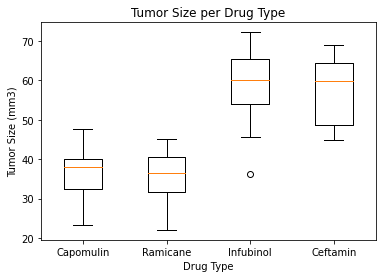

In [90]:
drug_plots = [capo_final_vol["Tumor Volume (mm3)"], rami_final_vol["Tumor Volume (mm3)"], infu_final_vol["Tumor Volume (mm3)"], ceft_final_vol["Tumor Volume (mm3)"]]
fig7, ax7 = plt.subplots()
ax7.set_title("Tumor Size per Drug Type")
plt.boxplot(drug_plots)
drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.xlabel("Drug Type")
plt.ylabel("Tumor Size (mm3)")

plt.show()

## Line and Scatter Plots

In [76]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_total_tumor = regimen_trim[regimen_trim["Drug Regimen"] == "Capomulin"]
capomulin_total_tumor


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint
10,s185,Capomulin,Female,3,17,0,45.000000,0,False,45
11,s185,Capomulin,Female,3,17,5,43.878496,0,False,45
12,s185,Capomulin,Female,3,17,10,37.614948,0,False,45
13,s185,Capomulin,Female,3,17,15,38.177232,0,False,45
14,s185,Capomulin,Female,3,17,20,36.866876,0,False,45
...,...,...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1,False,45
1447,r157,Capomulin,Male,22,25,0,45.000000,0,False,15
1448,r157,Capomulin,Male,22,25,5,45.597064,0,False,15
1449,r157,Capomulin,Male,22,25,10,46.059608,0,False,15


In [117]:
mouse_s185 = regimen_trim[regimen_trim["Mouse ID"] == "s185"]
mouse_s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint
10,s185,Capomulin,Female,3,17,0,45.000000,0,False,45
11,s185,Capomulin,Female,3,17,5,43.878496,0,False,45
12,s185,Capomulin,Female,3,17,10,37.614948,0,False,45
13,s185,Capomulin,Female,3,17,15,38.177232,0,False,45
14,s185,Capomulin,Female,3,17,20,36.866876,0,False,45
15,s185,Capomulin,Female,3,17,25,33.949940,0,False,45
16,s185,Capomulin,Female,3,17,30,32.959671,1,False,45
17,s185,Capomulin,Female,3,17,35,28.328531,1,False,45
18,s185,Capomulin,Female,3,17,40,25.472143,1,False,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,False,45


Text(0, 0.5, 'Tumor Volume (mm3)')

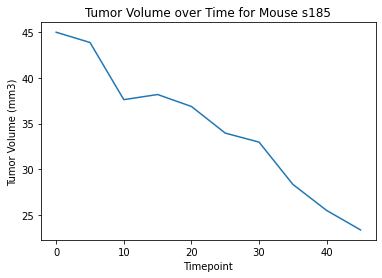

In [120]:
plt.plot(mouse_s185["Timepoint"], mouse_s185["Tumor Volume (mm3)"])
plt.title("Tumor Volume over Time for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [110]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_mouse = capomulin_total_tumor.groupby("Mouse ID")
avg_capo_tum_vol = capo_mouse["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_total_tumor.drop_duplicates(subset=["Mouse ID"])
mouse_weight = pd.merge(mouse_weight, avg_capo_tum_vol, on="Mouse ID", how="outer")
mouse_weight = mouse_weight[["Mouse ID", "Drug Regimen", "Weight (g)", "Tumor Volume (mm3)_y"]]
mouse_weight = mouse_weight.rename(columns={"Tumor Volume (mm3)_y": "Average Tumor Volume (mm3)"})
mouse_weight

##Need to get average tumor volume for each mouse and plot against its weight 

,Mouse ID,Drug Regimen,Weight (g),Average Tumor Volume (mm3)
0,s185,Capomulin,17,34.559143
1,x401,Capomulin,15,36.182040
2,m601,Capomulin,17,34.847470
3,f966,Capomulin,17,36.505973
4,u364,Capomulin,17,39.887495
5,y793,Capomulin,17,38.506829
6,r554,Capomulin,17,36.509212
7,m957,Capomulin,19,39.049816
8,t565,Capomulin,17,39.328725
9,i738,Capomulin,20,39.141053


In [112]:
mouse_weight.columns

Index(['Mouse ID', 'Drug Regimen', 'Weight (g)', 'Average Tumor Volume (mm3)'], dtype='object')

Text(0, 0.5, 'Mouse Weight (g)')

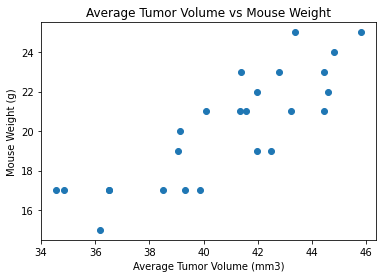

In [115]:
plt.scatter(mouse_weight["Average Tumor Volume (mm3)"], mouse_weight["Weight (g)"])
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
